In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno


In [39]:
df = pd.read_csv('train.csv')

In [40]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### numerical data

In [41]:
num_col = df._get_numeric_data().columns
len(num_col)

38

In [42]:
num_col

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

C:\Users\nandh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\nandh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\nandh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\nandh\anaconda3\lib\si

C:\Users\nandh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\nandh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\nandh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\nandh\anaconda3\lib\si

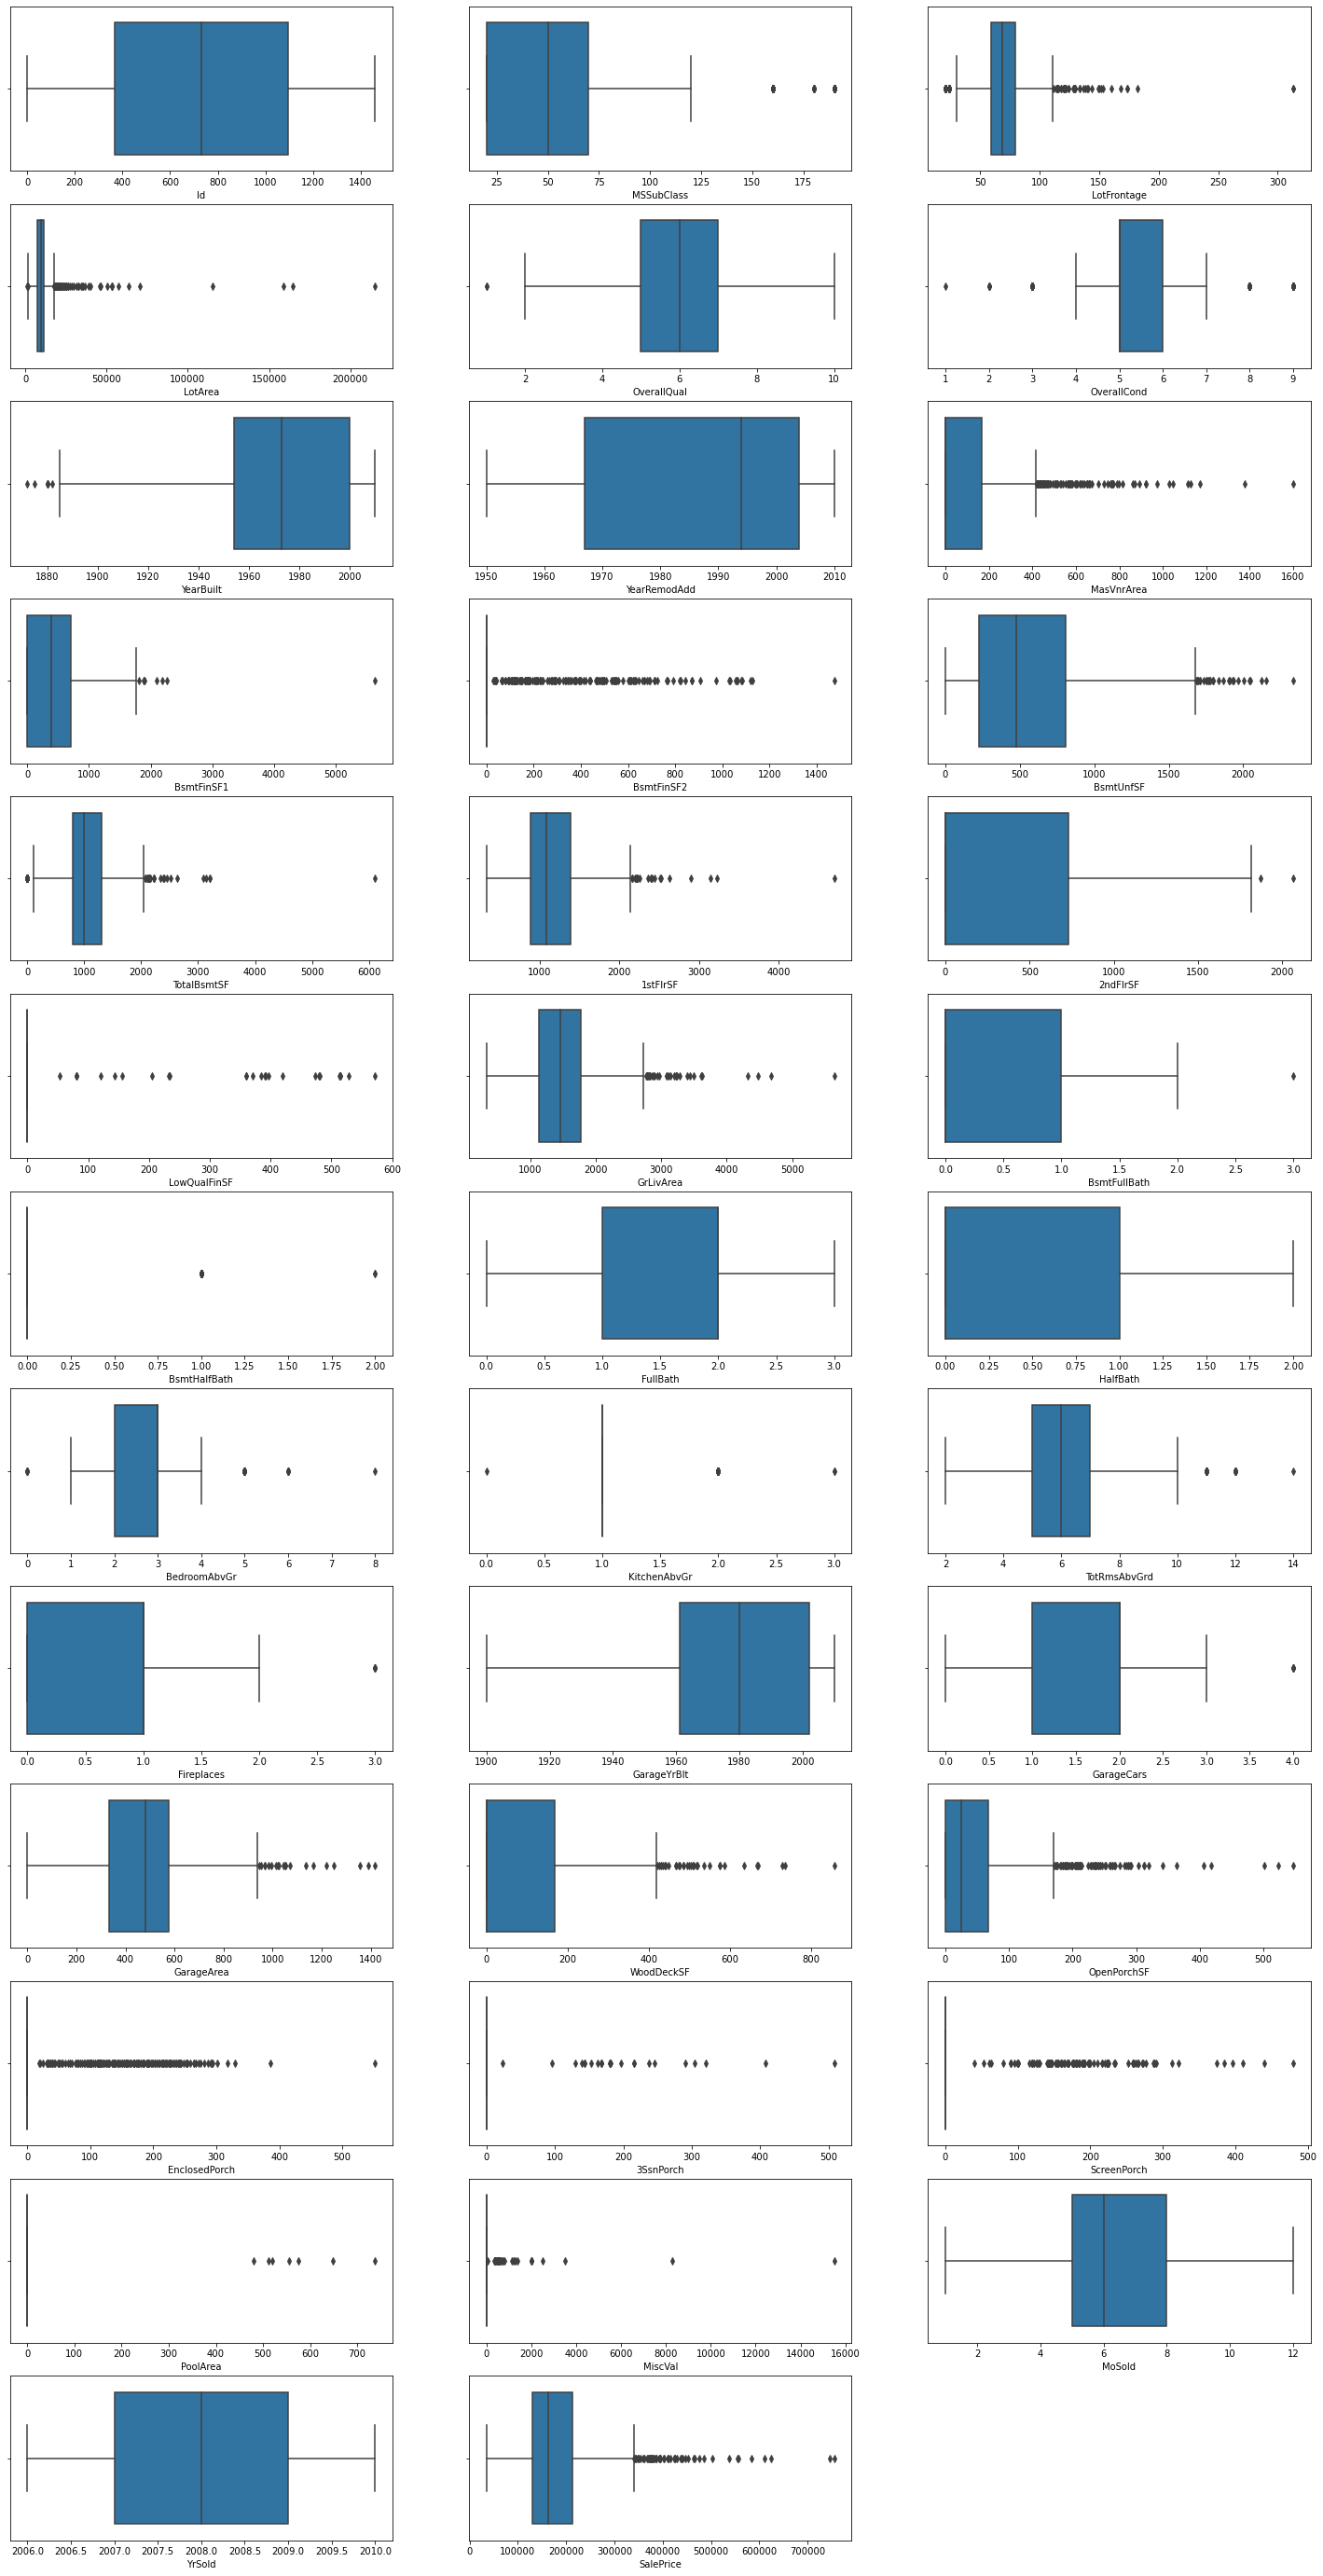

In [43]:
plt.figure(figsize=(25,50))
for i in enumerate(num_col):
    plt.subplot(13,3,i[0]+1)
    sns.boxplot(df[i[1]])
    plt.xlabel(i[1])

In [44]:

pd.set_option('display.max_rows',500)
df.isnull().sum()
    

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

dropping the values having more than % null values

In [45]:
df.shape

(1460, 81)

In [46]:
df.drop(['Id','Alley','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [47]:
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())
df['BsmtCond']=df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtQual']=df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])
df['BsmtFinType1']=df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])
df['FireplaceQu']=df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])
df['GarageType']=df['GarageType'].fillna(df['GarageType'].mode()[0])
df['GarageFinish']=df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual']=df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond']=df['GarageCond'].fillna(df['GarageCond'].mode()[0])
df['MasVnrType']=df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0])
df['BsmtExposure']=df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
df['BsmtFinType2']=df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])

In [48]:
df.dropna(inplace=True)

<AxesSubplot:>

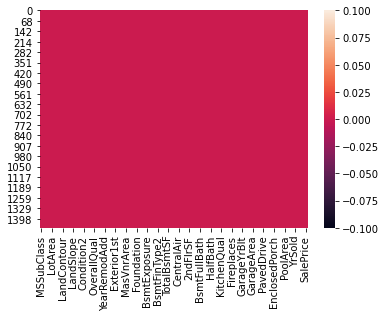

In [49]:
sns.heatmap(df.isnull())

Now we can see all the null values are removed

In [50]:
num_col = df._get_numeric_data().columns
num_col

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [51]:
df1 = pd.DataFrame(df[num_col],columns=num_col)

In [52]:
df1

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,366,0,112,0,0,0,0,4,2010,142125


<AxesSubplot:>

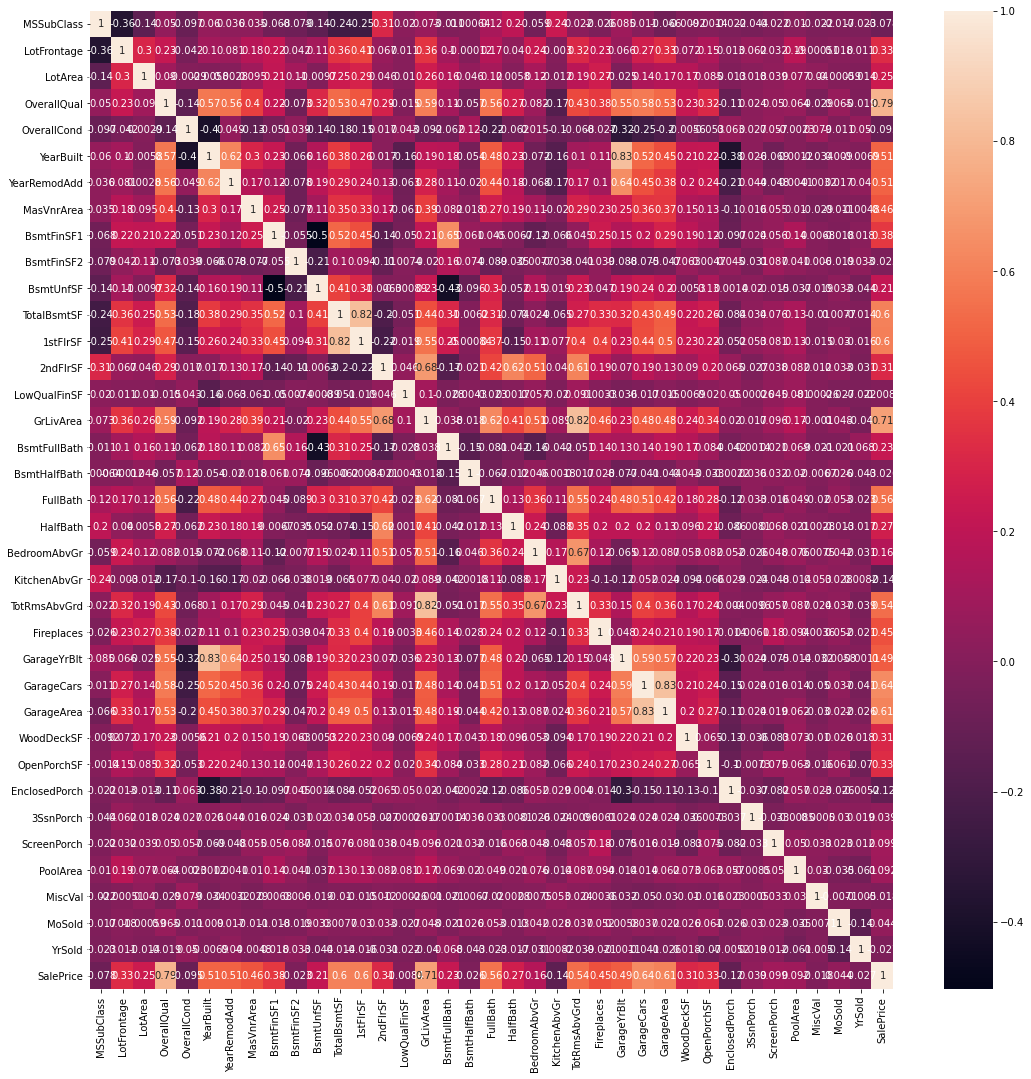

In [53]:
plt.figure(figsize=(18,18))
sns.heatmap(df1.corr(),annot=True,)

we can see 'GarageYrBlt' correlated with 'YearBuilt','TotRmsAbvGrd' with 'GrLivArea', '1stFlrSF' with 'TotalBsmtSF','GarageArea' with 'GarageCars'

we can remove one of the features in each coorelated one

In [54]:
df.drop(['GarageYrBlt','TotRmsAbvGrd','1stFlrSF','GarageCars'],axis=1,inplace=True)

In [55]:
df.shape

(1378, 72)

In [56]:
cat =[]
for i in df.columns:
    if df[i].dtype == 'O':
        cat.append(i)

In [57]:
len(cat)

39

In [58]:
df2 = pd.DataFrame(df[cat],columns=cat)

In [59]:
from sklearn.preprocessing import OrdinalEncoder

ordi = OrdinalEncoder()

df2_t = ordi.fit_transform(df2)

In [60]:
df2_t1 = pd.DataFrame(df2_t,columns=cat)

Removing Outliers

In [61]:
num_col = df._get_numeric_data().columns
len(num_col)

33

C:\Users\nandh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\nandh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\nandh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\nandh\anaconda3\lib\si

C:\Users\nandh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\nandh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\nandh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\nandh\anaconda3\lib\si

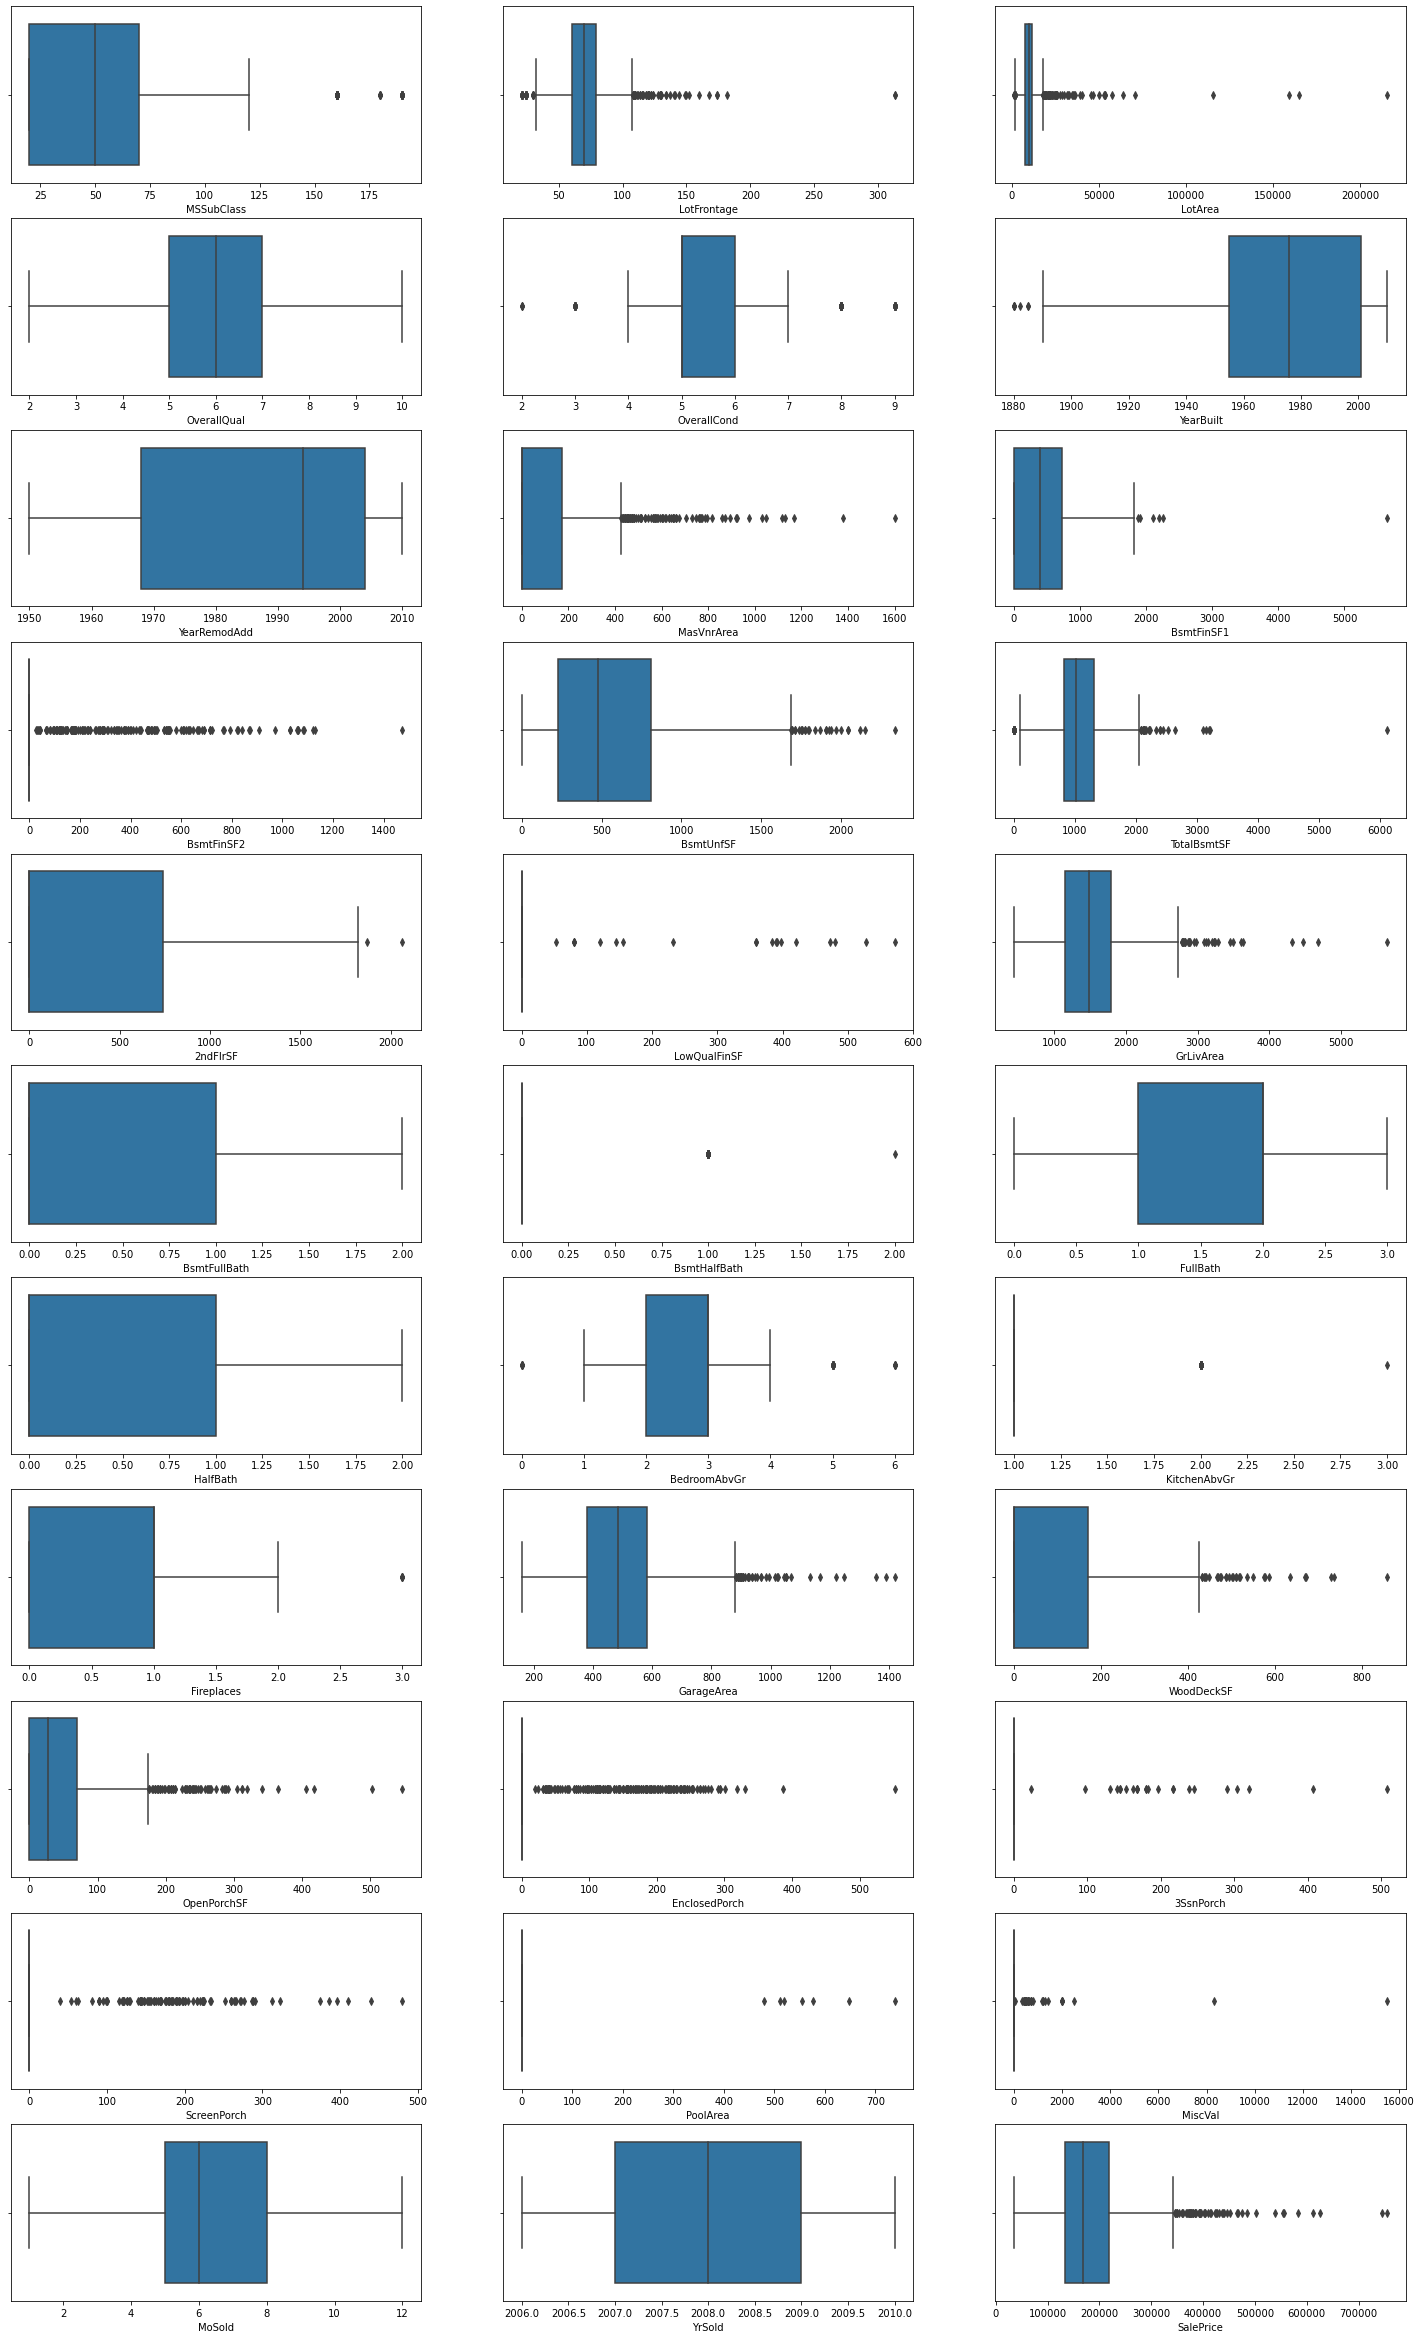

In [62]:
plt.figure(figsize=(25,50))
for i in enumerate(num_col):
    plt.subplot(13,3,i[0]+1)
    sns.boxplot(df[i[1]])
    plt.xlabel(i[1])

In [63]:
df[df['LotFrontage']>200]
df[df['LotArea']>50000]
df[df['MasVnrArea']>500]
df[df['BsmtFinSF1']>2000]
df[df['TotalBsmtSF']>2000]
df[df['2ndFlrSF']>2000]
df[df['GrLivArea']>3000]
df[df['GarageArea']>1000]
df[df['WoodDeckSF']>500]
df[df['MiscVal']>8000]
df[df['SalePrice']>400000]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
58,60,RL,66.000000,13682,Pave,IR2,HLS,AllPub,CulDSac,Gtl,...,37,0,0,0,0,10,2006,New,Partial,438780
161,60,RL,110.000000,13688,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,3,2008,WD,Normal,412500
178,20,RL,63.000000,17423,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,0,0,0,7,2009,New,Partial,501837
185,75,RM,90.000000,22950,Pave,IR2,Lvl,AllPub,Inside,Gtl,...,0,0,410,0,0,6,2006,WD,Normal,475000
231,60,RL,174.000000,15138,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,202,0,0,0,0,7,2009,WD,Normal,403000
278,20,RL,107.000000,14450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,142,0,0,5,2007,New,Partial,415298
349,60,RL,56.000000,20431,Pave,IR2,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,4,2006,New,Partial,437154
389,60,RL,96.000000,12474,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2008,New,Partial,426000
440,20,RL,105.000000,15431,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,170,0,0,4,2009,WD,Normal,555000
473,20,RL,110.000000,14977,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,7,2007,New,Partial,440000


In [64]:
index = [58,161,178,185,231,278,349,389,440,473,496,515,527,591,661,664,691,769,798,803,898,1046,1142,1169,1182,1243,1353,1373]

In [65]:
df = df.drop(labels=index,axis=0)

(array([     0.,  50000., 100000., 150000., 200000., 250000., 300000.,
        350000., 400000., 450000.]),
 [Text(0.0, 0, '0'),
  Text(50000.0, 0, '50000'),
  Text(100000.0, 0, '100000'),
  Text(150000.0, 0, '150000'),
  Text(200000.0, 0, '200000'),
  Text(250000.0, 0, '250000'),
  Text(300000.0, 0, '300000'),
  Text(350000.0, 0, '350000'),
  Text(400000.0, 0, '400000'),
  Text(450000.0, 0, '450000')])

<Figure size 1008x1008 with 0 Axes>

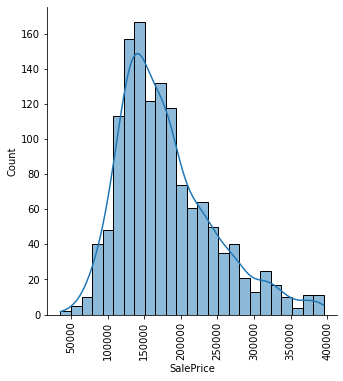

In [66]:
plt.figure(figsize=(14,14))
sns.displot(df['SalePrice'],kde =True)
plt.xticks(rotation = 90)


It forms as Normal distribution withh right skwed

In [67]:
df_te = pd.read_csv('train.csv')

remove the values we dont needed 'GarageYrBlt','TotRmsAbvGrd','1stFlrSF','GarageCars','Id','Alley','PoolQC','Fence','MiscFeature'

In [68]:
df_te.drop(['GarageYrBlt','TotRmsAbvGrd','1stFlrSF','GarageCars','Id','Alley','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [69]:
df_te

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [70]:
total_df = pd.concat([df,df_te],axis=0)


In [71]:
total_df.shape

(2810, 72)

In [72]:
cat =[]
for i in df.columns:
    if df[i].dtype == 'O':
        cat.append(i)

In [73]:
from sklearn.preprocessing import OrdinalEncoder
for i in cat:
    df_te[i] =
